In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def load_results(model_name):

    results = pd.read_csv(f"../results{model_name}.csv")
    # results = results.drop(results[results['tuning'] != 'standard'].index)

    fig, ax = plt.subplots(figsize=(20, 5))

    # sns.barplot(data=results, x="sampler", y="ESS", hue=results[['integrator', 'preconditioning', 'inv_L_prop']].apply(
    # lambda row: f"{row.integrator}, {row.preconditioning}, {row.inv_L_prop}", axis=1), ax=ax)

    results = results.drop(results[results['inv_L_prop'] != 0.0].index)
    sns.barplot(data=results, x="sampler", y="ESS", hue=results[['integrator', 'preconditioning']].apply(
    lambda row: f"{row.integrator}, {row.preconditioning}", axis=1), ax=ax)

    plt.xlabel("Sampler")
    plt.ylabel("ESS")
    plt.title(model_name)
    plt.show()
    plt.show()
    display(results)


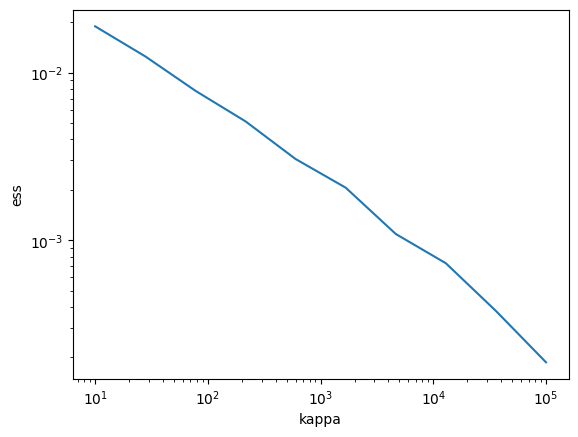

,model,dims,kappa,target_acc_rate,true_rate,sampler,integrator,L,step_size,ess,ess_avg,ess_corr_max,ess_corr_avg
0,IllConditionedGaussian,100,10,0.9,0.902650,mclmc,mclachlan,12.660197,9.702756,0.018933,0.152669,0.577770,0.566674
1,IllConditionedGaussian,100,28,0.9,0.909695,mclmc,mclachlan,15.299513,7.799138,0.012494,0.088809,0.832261,0.813821
2,IllConditionedGaussian,100,78,0.9,0.905134,mclmc,mclachlan,17.610725,6.292611,0.007788,0.053651,0.740556,0.728766
3,IllConditionedGaussian,100,216,0.9,0.906115,mclmc,mclachlan,18.744579,4.955719,0.005126,0.033214,0.700977,0.690170
4,IllConditionedGaussian,100,600,0.9,0.908890,mclmc,mclachlan,16.140837,3.896018,0.003056,0.023254,0.620867,0.613009
5,IllConditionedGaussian,100,1669,0.9,0.899344,mclmc,mclachlan,35.373861,2.978583,0.002062,0.012797,0.715695,0.702647
6,IllConditionedGaussian,100,4642,0.9,0.902264,mclmc,mclachlan,41.657121,2.262022,0.001091,0.007962,0.714661,0.700338
7,IllConditionedGaussian,100,12916,0.9,0.899240,mclmc,mclachlan,46.664314,1.741621,0.000730,0.004885,0.690335,0.678108
8,IllConditionedGaussian,100,35939,0.9,0.904230,mclmc,mclachlan,46.104104,1.344952,0.000379,0.003144,0.665041,0.658944
9,IllConditionedGaussian,100,100000,0.9,0.885403,mclmc,mclachlan,38.961141,1.088600,0.000187,0.002139,0.594917,0.586592


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
# Load the CSV file
df = pd.read_csv('../grid_search_L1.csv')

# df['predictedL'] = 0.4 * df['L'] / (df['ess_corr']/df['true_rate'])
# df 
# filter df for just omelyan
# df = df[df['integrator'] == 'omelyan']
# df['sampler']

# Plot the ess_avg against dimension on a log scale
# plt.plot(df['dims'], df['ESS'])
# plt.xscale('log')

# df = df[np.abs(df['kappa'] - 17.782794) < 0.1]

# plot = sns.lineplot(data=df, x="L", y="ess", style="kappa", hue="true_rate")
# plot = sns.lineplot(data=df, x="target_acc_rate", y="L")
# plot = sns.lineplot(data=df, x="target_acc_rate", y="predictedL")
plot = sns.lineplot(data=df, x="kappa", y="ess")
# plot = sns.lineplot(data=df, x="target_acc_rate", y="ess_corr")


# plot = sns.lineplot(data=df, x="target_acc_rate", y="L")
# plot = sns.lineplot(data=df, x="target_acc_rate", y="ess_corr")
plot.set(xscale='log')
plot.set(yscale='log')
# plt.xlabel('L')
# plt.ylabel('ESS corr')
# plt.title('ESS Average vs Dimension')
plt.show()

df

In [1]:

# import sys

# sys.path.append("../")


# from benchmarks.inference_models import Brownian, Gaussian, GermanCredit, ItemResponseTheory, Rosenbrock
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# from matplotlib import rcParams

# rcParams['figure.figsize'] = 8.7,6.27

# def load_results_all(eigenval_type):


#     models = [
#     Gaussian(100, k, eigenvalues=eigenval_type)
#     for k in np.ceil(np.logspace(1, 5, num=10)).astype(int)[:]
#     ][:]
    

#     key_index = 24


#     nongridresults = pd.concat([pd.read_csv(f"../results{model.name}{model.ndims}{key_index}.csv") for model in models], ignore_index=True)
#     fastgridresults = pd.concat([pd.read_csv(f"../fastgrid_results{model.name}{model.ndims}{key_index}.csv") for model in models], ignore_index=True)
#     # gridresults = pd.concat([pd.read_csv(f"../gridresults{model.name}{model.ndims}{key_index}.csv") for model in models], ignore_index=True)
#     results = pd.concat([nongridresults, fastgridresults], ignore_index=True)
#     # results = pd.concat([nongridresults], ignore_index=True)

#     display(results)

#     # results = results[results['model'] == 'Brownian']
#     # results = results[results['sampler'] == 'nuts']
#     # results = results[results['num_windows'] == 2]
#     # results = results[results['sampler'] != 'mhmclmc:st3:0.9']
#     # results = results[results['sampler'] != 'mhmclmc:0.9']
#     # results = results[results['sampler'] != 'mclmc:st2']
#     # results = results[results['sampler'] != 'mclmc:st3']
#     # results = results[results['sampler'] != 'mclmc:grid_edgeTrue']
#     results = results[((results['sampler'] == 'adjusted_mclmc:0.91.3') & (results['worst'] == True)) | (results['sampler'] == 'adjusted_mclmc:fast_gridFalse'  ) | (results['sampler'] == 'nuts')]
#     # results = results[results['worst'] != True]

#     # results = results[results['sampler'] == 'mhmchmc:grid_edgeFalse']
#     # results = results[results['sampler'] != 'nuts']
#     results = results[results['preconditioning'] == False]

#     # results = results[~results.index.duplicated()]



#     # results["predictedL"] = 0.8 * results['L'] / ((results['inv_ess_corr'])/results['acc_rate'])


#     results['kappa'] = results['model'].apply(lambda x: int(x.split("_")[2]))
#     # results['model'] = results['model'].apply(lambda x: x.split("n")[3])+'k-'+results['dims'].apply(str)+'d'
#     # results['kappa'] = results['model'].apply(lambda x: int(x.split("_")[2]))
#     results["optimalLavg"] = results.apply(lambda row: np.sqrt(np.mean(Gaussian(row['dims'], row['kappa'],eigenval_type).E_x2)*row['dims']), axis=1)
#     results["optimalLmax"] = results.apply(lambda row: np.sqrt(np.max(Gaussian(row['dims'], row['kappa'],eigenval_type).E_x2)*row['dims']), axis=1)

#     results2 = results
#     # results2 = results2[results2['sampler'] == 'adjusted_mclmc:0.9'] 

#     # results["L"] /= results["optimalLavg"]

#     results['sampler'] = results['sampler'] + results['inv_L_prop'].apply(str)

#     # sns.lineplot(data=results, x="kappa", y="ess_corr_avg", style="worst", label="ess_corr_avg")
#     # sns.lineplot(data=results, x="kappa", y="ess_corr_min", style="worst", label="ess_corr_min")
    
#     sns.lineplot(data=results, x="kappa", y="L", hue="sampler", style='num_windows')
#     sns.lineplot(data=results2, x="kappa", y="optimalLavg", label="$Tr[\Sigma]$")
#     # sns.lineplot(data=results2, x="kappa", y="optimalLmax", label="analytical L max")
#     plt.title(eigenval_type)
#     plt.xscale('log')
#     plt.show()

#     # sns.lineplot(data=results, x="dims", y="predictedL", hue="sampler")
#     # sns.lineplot(data=results, x="model", y="step_size", hue="sampler")
#     # # plt.legend()
#     # plt.show()

#     # results['huecol'] = results['sampler'] + results['inv_L_prop'].apply(str)
    
    
#     sns.lineplot(data=results, x="kappa", y="ESS", hue="sampler", style="num_windows")
#     plt.xscale('log')
#     plt.yscale('log')
#     # plot power line at x^{-1/2}
#     x = np.linspace(10, 1000000, 100)
#     y = x**(-1/2)
#     sns.lineplot(x=x,y=y)
#     plt.show()
#     # plt.legend()
#     # plt.ylabel("ess max")
#     # plt.title(eigenval_type)
#     # plt.show()

#     # sns.barplot(data=results, x="dims", y="L", hue="sampler")

#     display(results)
   
# load_results_all('log')
# load_results_all('outliers')

In [ ]:

import sys

sys.path.append("../")


from benchmarks.inference_models import Brownian, Gaussian, GermanCredit, ItemResponseTheory, Rosenbrock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib import rcParams

rcParams['figure.figsize'] = 8.7,6.27

def load_results_all(eigenval_type):


    models = [
    Gaussian(100, k, eigenvalues=eigenval_type)
    for k in np.ceil(np.logspace(1, 5, num=10)).astype(int)[:7]
    ][:]
    

    key_index = 25


    nongridresults = pd.concat([pd.read_csv(f"../results/nongridresults{model.name}{model.ndims}{key_index}.csv") for model in models], ignore_index=True)
    fastgridresults = pd.concat([pd.read_csv(f"../results/fastgridresults{model.name}{model.ndims}{key_index}.csv") for model in models], ignore_index=True)
    # gridresults = pd.concat([pd.read_csv(f"../gridresults{model.name}{model.ndims}{key_index}.csv") for model in models], ignore_index=True)
    results = pd.concat([nongridresults, fastgridresults], ignore_index=True)
    # results = pd.concat([nongridresults], ignore_index=True)


    results = results[((results['sampler'] == 'adjusted_mclmc:0.90.5') & (results['worst'] == 'max')) | (results['sampler'] == 'adjusted_mclmc:fast_gridFalse'  ) | (results['sampler'] == 'adjusted_mchmc:fast_gridFalse'  ) | (results['sampler'] == 'nuts')]
    results = results[results['preconditioning'] == False]
    
    results['kappa'] = results['model'].apply(lambda x: int(x.split("_")[2]))
    # results['model'] = results['model'].apply(lambda x: x.split("n")[3])+'k-'+results['dims'].apply(str)+'d'
    # results['kappa'] = results['model'].apply(lambda x: int(x.split("_")[2]))
    results["optimalLavg"] = results.apply(lambda row: np.sqrt(np.mean(Gaussian(row['dims'], row['kappa'],eigenval_type).E_x2)*row['dims']), axis=1)
    results["optimalLmax"] = results.apply(lambda row: np.sqrt(np.max(Gaussian(row['dims'], row['kappa'],eigenval_type).E_x2)*row['dims']), axis=1)

    results = results.rename(columns={"kappa" : "condition number"})
    results2 = results
    results['sampler'] = results['sampler'] + results['inv_L_prop'].apply(str)

    results['sampler'] = results['sampler'].apply(lambda x: {
        'adjusted_mclmc:0.90.50.0' : 'MAMS',
        # (with tuning scheme for L and $\epsilon$)',
        'adjusted_mclmc:0.90.50.8' : 'Langevin MAMS',
        'nuts0.0' : 'NUTS',
        'adjusted_mchmc:fast_gridFalse0.0' : 'MAMS',
        'adjusted_mclmc:fast_gridFalse0.0' : 'Langevin MAMS',
        }[x])
    # display(results)

    results['tuning'] = results["tuning"].apply(lambda x: {
        'standard' : 'automatic',
        'gridsearch' : "grid search",
        }[x])


    results2 = results2[results2['sampler'] != 'NUTS']
    results2 = results2[results2['condition number'] < 10e4 ]

    return results, results2

    # display(results2)
    # results2.drop(results2.columns[results2.apply(check_column)], axis=1)
    

def plot_results(results, results2, results3, results4):

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    sns.lineplot(data=results2, x="condition number", y="L", hue="sampler", style='tuning', ax=axes[0][0])
    axes[0][0].set_xscale('log')
    sns.lineplot(data=results, x="condition number", y="ESS", hue="sampler", style="tuning", ax=axes[0][1])
    axes[0][1].set_xscale('log')
    axes[0][1].set_yscale('log')
    axes[0][1].set_ylim(0, 1e-1)
    for pos in np.logspace(-4,4, 20):
        axes[0][1].axline((10, pos * 10**(-1/2)), (100, pos * 100**(-1/2)), color='grey', alpha=0.1)
    plt.tight_layout()
    # plt.title(f'Ill-conditioned Normal distribution with {eigenval_type} distributed eigenvalues                                                                           ')
    
    sns.lineplot(data=results4, x="condition number", y="L", hue="sampler", style='tuning', ax=axes[1][0])
    axes[1][0].set_xscale('log')
    sns.lineplot(data=results3, x="condition number", y="ESS", hue="sampler", style="tuning", ax=axes[1][1])
    axes[1][1].set_xscale('log')
    axes[1][1].set_yscale('log')
    axes[1][1].set_ylim(0, 1e-1)
    for pos in np.logspace(-4,4, 20):
        axes[1][1].axline((10, pos * 10**(-1/2)), (100, pos * 100**(-1/2)), color='grey', alpha=0.1)
    plt.tight_layout()
    # plt.title(f'Ill-conditioned Normal distribution with {eigenval_type} distributed eigenvalues                                                                           ')
    plt.show()

    # display(results)
    

   
results, results2 = load_results_all('log')
results3, results4 = load_results_all('outliers')

plot_results(results, results2, results3, results4)

In [10]:



from math import ceil
from benchmarks.inference_models import Brownian, Gaussian, GermanCredit, ItemResponseTheory, Rosenbrock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib import rcParams

rcParams['figure.figsize'] = 8.7,6.27

def load_results_all():


    # models = {Gaussian(d, condition_number=1., eigenvalues='linear'): {'mclmc': 1000, 'adjusted_mclmc': 1000, 'nuts': 1000}
    # for d in [2,3,4,5,6,7,8,9] 
    # + list(np.ceil(np.logspace(2, 5, num=10)).astype(int))[:]
    # }



    first_list = np.array([2,3,4,5,6,7,8,9])
    second_list = np.ceil(np.logspace(2, 5, num=10)).astype(int)[:]

    models = {model(d): {'mclmc': 1000, 'adjusted_mclmc': 1000, 'nuts': 1000}
        for d in np.concatenate([first_list, second_list]) for model in [
            # lambda dim: Gaussian(dim, condition_number=1., eigenvalues='linear'), 
            # lambda dim : Gaussian(dim, condition_number=1000, eigenvalues='log'), 
                                           lambda d: Rosenbrock(d)
                                        ]
        }


    

    key_index = 20


    nongridresults = pd.concat([pd.read_csv(f"../results{model.name}{model.ndims}{key_index}.csv") for model in models], ignore_index=True)
    gridresults = pd.concat([pd.read_csv(f"../fastgrid_results{model.name}{model.ndims}{key_index}.csv") for model in models], ignore_index=True)
    results = pd.concat([nongridresults, gridresults], ignore_index=True)

    # results = results[results['model'] == 'Brownian']
    # results = results[results['sampler'] != 'nuts']
    # results = results[results['num_windows'] == 2]
    # results = results[(results['sampler'] == 'adjusted_mclmc:fast_gridFalse') | (results['sampler'] == 'nuts') | (results['sampler'] == 'adjusted_mclmc:fast_gridTrue')]

    # results = results[(results['sampler'] == 'mclmc:fast_gridFalse') | (results['sampler'] == 'nuts') | (results['sampler'] == 'mclmc:fast_gridTrue')]

    results = results[(((results['sampler'] == 'adjusted_mclmc:0.91.3') & (results['num_windows']==2)) & (results['worst'] == False)) | (results['sampler'] == 'nuts') | (results['sampler'] == 'adjusted_mclmc:fast_gridFalse') | (results['sampler'] == 'mclmc:fast_gridFalse')]

    # results = results[((results['sampler'] == 'mclmc:st3') & (results['worst'] == False) & (results['num_windows'] == 2)) | (results['sampler'] == 'nuts')]
    # results = results[((results['sampler'] == 'mclmc:st3') & (results['num_windows'] == 2)  )  | (results['sampler'] == 'nuts')]
    # results = results[results['sampler'] != 'mclmc:grid_edgeFalse']
    # results = results[results['worst'] != True]
    # results = results[results['worst'] == False]
    # results = results[results['inv_L_prop'] != 0.0]

    # results = results[results['sampler'] == 'mhmchmc:grid_edgeFalse']
    # results = results[results['sampler'] != 'nuts']
    # results = results[results['preconditioning'] == False]

    # results = results[~results.index.duplicated()]


    # results["predictedL"] = 0.8 * results['L'] / ((results['inv_ess_corr'])/results['acc_rate'])


    # results['kappa'] = results['model'].apply(lambda x: int(ceil(float(x.split("_")[2]))))
    # # results['model'] = results['model'].apply(lambda x: x.split("n")[3])+'k-'+results['dims'].apply(str)+'d'
    # # results['kappa'] = results['model'].apply(lambda x: int(x.split("_")[2]))
    # results["optimalLavg"] = results.apply(lambda row: np.sqrt(np.mean(Gaussian(row['dims'], row['kappa'],'linear').E_x2)*row['dims']), axis=1)
    # results["optimalLmax"] = results.apply(lambda row: np.sqrt(np.max(Gaussian(row['dims'], row['kappa'],'linear').E_x2)*row['dims']), axis=1)

    # results2 = results
    # results2 = results2[results2['sampler'] == 'adjusted_mclmc:0.9'] 

    # results["L"] /= results["optimalLavg"]

    # sns.lineplot(data=results, x="kappa", y="ess_corr_avg", style="worst", label="ess_corr_avg")
    # sns.lineplot(data=results, x="kappa", y="ess_corr_min", style="worst", label="ess_corr_min")
    # sns.lineplot(data=results, x="dims", y="ess_avg", hue="sampler", style='integrator')
    # sns.lineplot(data=results2, x="kappa", y="optimalLavg", label="analytical L avg")
    # sns.lineplot(data=results2, x="kappa", y="optimalLmax", label="analytical L max")
    # sns.lineplot(data=results, x="model", y="sqrt(dim)")
    # plt.title("ICG")
    # plt.show()

    # sns.lineplot(data=results, x="dims", y="predictedL", hue="sampler")
    # sns.lineplot(data=results, x="model", y="step_size", hue="sampler")
    # # plt.legend()
    # plt.show()

    results['sampler'] = results['sampler'] + ' : ' + results['inv_L_prop'].apply(lambda x: 'randomized,noiseless trajectory' if x==0.0 else 'noisy trajectory')
    
    
    sns.lineplot(data=results, x="dims", y="ess_avg", hue="sampler", style="integrator")
    x = np.linspace(results['dims'].min(), results['dims'].max(), 100)
    y = x**(-1/4)
    y2 = x**(-1/8)
    # sns.lineplot(x=x, y=y, color='red', linestyle='dashdot', label='(d^-1/4)')
    # sns.lineplot(x=x, y=y2, color='purple', linestyle='dashdot', label='(d^-1/8)')
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    # plt.title('integrator comparison with grid search unadjusted mclmc vs nuts (tuned)')
    plt.show()

    # sns.barplot(data=results, x="dims", y="L", hue="sampler")

    # plt.xscale('log')
    # plt.ylabel("ess_corr")
    display(results)
    # plt.show()
   
# load_results_all('log')
load_results_all()

FileNotFoundError: [Errno 2] No such file or directory: '../resultsRosenbrock220.csv'

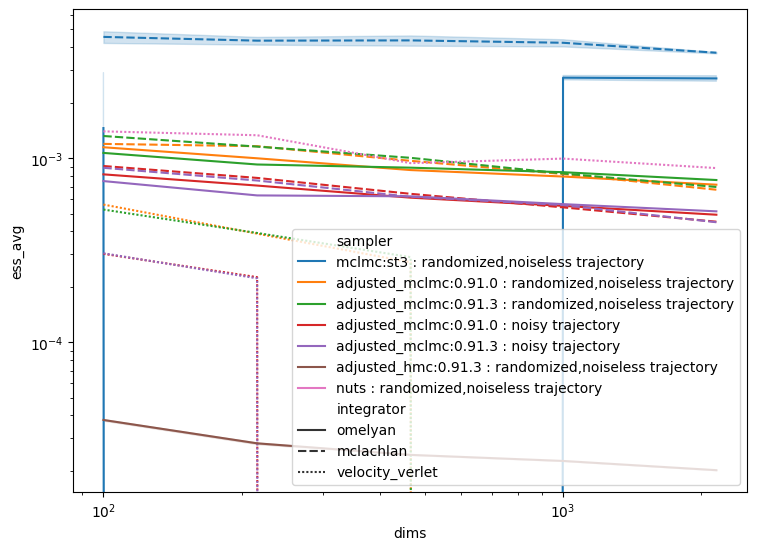

,model,dims,sampler,L,step_size,integrator,tuning,acc_rate,preconditioning,inv_L_prop,ess_avg,ess_corr_avg,ess_corr_min,ess_corr_inv_mean,num_steps,num_chains,worst,num_windows,ESS
0,Rosenbrock,100,"mclmc:st3 : randomized,noiseless trajectory",47.266502,1.695565,omelyan,standard,1.000000,False,0.0,0.000000,inf,inf,inf,20000,128,False,1,0.000000
1,Rosenbrock,100,"mclmc:st3 : randomized,noiseless trajectory",40.147591,1.703937,omelyan,standard,1.000000,False,0.0,0.002912,inf,inf,inf,20000,128,False,2,0.000000
2,Rosenbrock,100,"adjusted_mclmc:0.91.0 : randomized,noiseless t...",28.685608,1.264079,omelyan,standard,0.918754,False,0.0,0.001146,inf,inf,inf,20000,128,max,2,0.000129
3,Rosenbrock,100,"adjusted_mclmc:0.91.3 : randomized,noiseless t...",23.242348,1.302411,omelyan,standard,0.912942,False,0.0,0.001067,inf,inf,inf,20000,128,avg,2,0.000123
4,Rosenbrock,100,adjusted_mclmc:0.91.0 : noisy trajectory,28.192028,1.256263,omelyan,standard,0.914155,False,0.8,0.000816,inf,inf,inf,20000,128,max,2,0.000084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Rosenbrock,2156,adjusted_mclmc:0.91.0 : noisy trajectory,19.472885,0.769611,velocity_verlet,standard,0.905452,False,0.8,0.000000,inf,inf,inf,20000,128,max,2,0.000000
121,Rosenbrock,2156,adjusted_mclmc:0.91.3 : noisy trajectory,19.162149,0.770319,velocity_verlet,standard,0.905367,False,0.8,0.000000,inf,inf,inf,20000,128,avg,2,0.000000
122,Rosenbrock,2156,"adjusted_hmc:0.91.3 : randomized,noiseless tra...",1.630465,0.031525,velocity_verlet,standard,0.683201,False,0.0,0.000000,inf,inf,inf,20000,128,max,3,0.000000
123,Rosenbrock,2156,"adjusted_hmc:0.91.3 : randomized,noiseless tra...",1.630465,0.031525,velocity_verlet,standard,0.683201,False,0.0,0.000000,inf,inf,inf,20000,128,avg,3,0.000000


In [17]:



from math import ceil
from benchmarks.inference_models import Brownian, Gaussian, GermanCredit, ItemResponseTheory, Rosenbrock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib import rcParams

rcParams['figure.figsize'] = 8.7,6.27

def load_results_all():


    # models = {Gaussian(d, condition_number=1., eigenvalues='linear'): {'mclmc': 1000, 'adjusted_mclmc': 1000, 'nuts': 1000}
    # for d in [2,3,4,5,6,7,8,9] 
    # + list(np.ceil(np.logspace(2, 5, num=10)).astype(int))[:]
    # }



    first_list = np.array([2,3,4,5,6,7,8,9])
    second_list = np.ceil(np.logspace(2, 5, num=10)).astype(int)[:5]

    models = {model(d): {'mclmc': 1000, 'adjusted_mclmc': 1000, 'nuts': 1000}
        for d in np.concatenate([second_list]) for model in [
            # lambda dim: Gaussian(dim, condition_number=1., eigenvalues='linear'), 
            # lambda dim : Gaussian(dim, condition_number=1000, eigenvalues='log'), 
                                           lambda d: Rosenbrock(d)
                                        ]
        }


    

    key_index = 20


    nongridresults = pd.concat([pd.read_csv(f"../results/nongridresults{model.name}{model.ndims}{key_index}.csv") for model in models], ignore_index=True)
    # gridresults = pd.concat([pd.read_csv(f"../fastgrid_results{model.name}{model.ndims}{key_index}.csv") for model in models], ignore_index=True)
    results = pd.concat([nongridresults], ignore_index=True)


    # results = results[(((results['sampler'] == 'adjusted_mclmc:0.91.3') & (results['num_windows']==2)) & (results['worst'] == False)) | (results['sampler'] == 'nuts') | (results['sampler'] == 'adjusted_mclmc:fast_gridFalse') | (results['sampler'] == 'mclmc:fast_gridFalse')]


    results['sampler'] = results['sampler'] + ' : ' + results['inv_L_prop'].apply(lambda x: 'randomized,noiseless trajectory' if x==0.0 else 'noisy trajectory')
    
    
    sns.lineplot(data=results, x="dims", y="ess_avg", hue="sampler", style="integrator")
    x = np.linspace(results['dims'].min(), results['dims'].max(), 100)

    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    display(results)
   
load_results_all()

In [7]:



from benchmarks.inference_models import Brownian, GermanCredit, ItemResponseTheory, Rosenbrock, Gaussian, StochasticVolatility
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

def load_results_all():

    # models = {
    # IllConditionedGaussian(100, k): {'mclmc': 20000, 'adjusted_mclmc': 20000, 'nuts': 10000}
    # for k in np.ceil(np.logspace(1, 5, num=10)).astype(int)
    # }

    models = {

    #     IllConditionedGaussian(10, 10) : {'mclmc': 10000, 'adjusted_mclmc' : 10000, 'nuts': 10000},
    #     IllConditionedGaussian(10, 100) : {'mclmc': 10000, 'adjusted_mclmc' : 10000, 'nuts': 10000},
    #     IllConditionedGaussian(10, 1000) : {'mclmc': 10000, 'adjusted_mclmc' : 10000, 'nuts': 10000},
    #     IllConditionedGaussian(10, 10000) : {'mclmc': 10000, 'adjusted_mclmc' : 10000, 'nuts': 10000},
        # IllConditionedGaussian(10, 100000) : {'mclmc': 10000, 'adjusted_mclmc' : 10000, 'nuts': 10000},
    #     # IllConditionedGaussian(1000, 10) : {'mclmc': 10000, 'adjusted_mclmc' : 10000, 'nuts': 10000},
    #     # IllConditionedGaussian(1000, 100) : {'mclmc': 10000, 'adjusted_mclmc' : 10000, 'nuts': 10000},
    #     # IllConditionedGaussian(1000, 1000) : {'mclmc': 10000, 'adjusted_mclmc' : 10000, 'nuts': 10000},
    #     # IllConditionedGaussian(1000, 10000) : {'mclmc': 10000, 'adjusted_mclmc' : 10000, 'nuts': 10000},
    #     # IllConditionedGaussian(1000, 100000) : {'mclmc': 10000, 'adjusted_mclmc' : 10000, 'nuts': 10000},

        # StandardNormal(10) : {'mclmc': 2000, 'adjusted_mclmc' : 2000, 'nuts': 2000},
        # StandardNormal(50) : {'mclmc': 2000, 'adjusted_mclmc' : 2000, 'nuts': 2000},
        # StandardNormal(100) : {'mclmc': 2000, 'adjusted_mclmc' : 2000, 'nuts': 2000},
        # StandardNormal(500) : {'mclmc': 4000, 'adjusted_mclmc' : 4000, 'nuts': 4000},
        # StandardNormal(1000) : {'mclmc': 4000, 'adjusted_mclmc' : 4000, 'nuts': 4000},
        # Brownian(): {"mclmc": 10000, "adjusted_mclmc": 10000, "nuts": 10000},
        # GermanCredit( ): {'mclmc': 80000, 'adjusted_mclmc' : 80000, 'nuts': 80000},
        # ItemResponseTheory(): {'mclmc': 40000, 'adjusted_mclmc' : 40000, 'nuts': 40000},
        # Rosenbrock(): {'mclmc': 20000, 'adjusted_mclmc' : 20000, 'nuts': 20000},
        StochasticVolatility(): {'mclmc': 20000, 'adjusted_mclmc' : 20000, 'nuts': 20000},
    }
    key_index = 24

    # preconditioning = False
    

    nongrid_results = pd.concat([pd.read_csv(f"../results{model.name}{model.ndims}{key_index}.csv") for model in models])
    fastgrid_results = pd.concat([pd.read_csv(f"../fastgrid_results{model.name}{model.ndims}{key_index}.csv") for model in models])
    # grid_results = pd.concat([pd.read_csv(f"../gridresults{model.name}{model.ndims}{key_index}.csv") for model in models])
    # results = pd.concat([nongrid_results, fastgrid_results, grid_results], ignore_index=True)
    results = pd.concat([nongrid_results, fastgrid_results, ], ignore_index=True)
    display(results)
    # results = pd.concat([fastgrid_results, ], ignore_index=True)
    # results = nongrid_results
    # results = results[results['model'] == 'Brownian']
    # results = results[results['sampler'] != 'nuts']
    # results = results[results['sampler'] != 'mhmclmc:st3:0.9']
    # results = results[results['sampler'] != 'mclmc:st3']
    # results = results[results['num_windows'] != 3]
    results = results[results['preconditioning'] == False]
    results = results[results['inv_L_prop'] != 0.8]
    # results = results[results['num_windows'] == 3]
    # results = results[results['worst'] == True]
    results = results[(results['sampler'] == 'nuts') | ((results['sampler'] == 'mclmc:st3') & (results['num_windows']==2)) | ((results['sampler'] == 'adjusted_mclmc:0.91.3') & (results['num_windows']==2)) | ((results['sampler'] == 'adjusted_mclmc:fast_gridFalse')) | (results['sampler'] == 'adjusted_hmc:fast_gridFalse') | (results['sampler'] == 'adjusted_mclmc:0.91.3')]

    # rename adjusted_mclmc:fast_gridFalse to adjusted_mclmc:fast_grid
    results['sampler'] = results['sampler'].apply(lambda x: 'adjusted_mclmc:fast_grid' if x == 'adjusted_mclmc:fast_gridFalse'  or x== 'adjusted_mclmc:fast_gridTrue' else x)


    # results["predictedL"] = 0.8 * results['L'] / ((results['inv_ess_corr'])/results['acc_rate'])
    # results["predictedL"] = results['L'] / ((results['ess_corr_inv_mean']))

    # print(results['mhmchmc:grid_edgeFalse'])
    # raise Exception

    # results.loc[-1] = ["Brownian",	32,	"predicted",6.903504	,	0.326798,	"mclachlan",	"standard",	0.892969,	False,	0.0,	0.036663	,0.393208	,0.072632,	0.358807,	10000	,True,	1.0,31.782712,	0.004857]
    # results.loc[-2] = ["GermanCredit",	32,	"predicted",46.817481	,	0.326798,	"mclachlan",	"standard",	0.892969,	False,	0.0,	0.036663	,0.393208	,0.072632,	0.358807,	10000	,True,	1.0, 31.782712,	0.004857]

    # results["sqrt(dim)"] = np.sqrt(results['dims'])
    # results["newmclmc"] = np.sqrt(results['dims'])

    # results['model'] = results['model'].apply(lambda x: x.split("n")[3])+'k-'+results['dims'].apply(str)+'d'
    # results['kappa'] = results['model'].apply(lambda x: int(x.split("k")[0]))
    # results["optimalL"] = results.apply(lambda row: np.sqrt(np.sum(IllConditionedGaussian(row['dims'], row['kappa']).E_x2)), axis=1)
    # results["scaled"] = results["L"] / results["optimalL"]

    results["huecol"] = "sampler:" + results["sampler"] + ", max:" + results['worst'].apply(str) + ", num_windows:" + results["num_windows"].apply(str) + ", L_proposal:" + (1/results["inv_L_prop"]).apply(str) 
    # + results['integrator']
    
    # results2 = results
    # results2 = results2[results2['sampler'] == 'mhmchmc:grid_edgeFalse'] 

    # sns.lineplot(data=results, x="integrator", y="scaled", hue="sampler")
    # sns.barplot(data=results2, x="integrator", y="optimalL", label="optimalL")
    sns.barplot(data=results, x="integrator", y="L", hue="huecol")
    # sns.barplot(data=results2, x="integrator", y="predictedL", label="predicted L")
    # sns.barplot(data=results, x="integrator", y="sqrt(dim)")
    plt.show()

    # sns.barplot(data=results, x="dims", y="predictedL", hue="sampler")
    # sns.barplot(data=results, x="integrator", y="step_size", hue="sampler")
    # # plt.legend()
    # plt.show()
    
    
    sns.barplot(data=results, x="integrator", y="ESS", hue="huecol")
    # plt.legend()
    # plt.show()
    # plt.title(f"{list((models.keys()))[0].name}")

    # sns.barplot(data=results, x="dims", y="L", hue="sampler")


    display(results)
    # results = results.drop(results[results['tuning'] != 'standard'].index)

    # fig, ax = plt.subplots(figsize=(20, 5))

    # # sns.barplot(data=results, x="sampler", y="ESS", hue=results[['integrator', 'preconditioning', 'inv_L_prop']].apply(
    # # lambda row: f"{row.integrator}, {row.preconditioning}, {row.inv_L_prop}", axis=1), ax=ax)

    # results = results.drop(results[results['inv_L_prop'] != 0.0].index)
    # sns.barplot(data=results, x="sampler", y="ESS", hue=results[['integrator', 'preconditioning']].apply(
    # lambda row: f"{row.integrator}, {row.preconditioning}", axis=1), ax=ax)

    # plt.xlabel("Sampler")
    # plt.ylabel("ESS")
    # plt.title(model_name)
    # plt.show()
    # plt.show()
    # display(results)

load_results_all()

FileNotFoundError: [Errno 2] No such file or directory: '../resultsStochasticVolatility242924.csv'

In [15]:

import sys

sys.path.append("../blackjax")
sys.path.append("../")

from benchmarks.inference_models import Brownian, Funnel, GermanCredit, ItemResponseTheory, Rosenbrock, Gaussian, StochasticVolatility
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

def load_results_all(key_index=27):

    models = [

        Gaussian(10),
        # Brownian(),
        # GermanCredit(),
        # Funnel(),
        # ItemResponseTheory(),
        # Rosenbrock(),
        # StochasticVolatility(),
    ]
    
    folder = 'results' 

    nongrid_results = pd.concat([pd.read_csv(os.path.join("..",folder,f"nongridresults{model.name}{model.ndims}{key_index}.csv")) for model in models])
    # fastgrid_results = pd.concat([pd.read_csv(os.path.join("..",folder,f"fastgridresults{model.name}{model.ndims}{key_index}.csv")) for model in models])

    results = pd.concat([nongrid_results, ], ignore_index=True)
    display(results)

    results = results[
        (results['sampler'] == 'nuts') 
        | ((results['sampler'] == 'mclmc:st3') & (results['num_windows']==2)) 
        # | ((results['sampler'] == 'adjusted_mclmc:0.91.3') & (results['num_windows']==3)) 
        | ((results['sampler'] == 'adjusted_mclmc:fast_gridFalse')) 
        | (results['sampler'] == 'adjusted_hmc:fast_gridFalse') 
        | (results['sampler'] == 'adjusted_mclmc:0.91.3')
        | (results['sampler'] == 'adjusted_mclmc:0.91.0')
        | (results['sampler'] == 'adjusted_hmc:0.91.3')
        ]

    # rename adjusted_mclmc:fast_gridFalse to adjusted_mclmc:fast_grid
    results['sampler'] = results['sampler'].apply(lambda x: 'adjusted_mclmc:fast_grid' if x == 'adjusted_mclmc:fast_gridFalse'  or x== 'adjusted_mclmc:fast_gridTrue' else x)

    results["huecol"] = "sampler:" + results["sampler"] + ", max:" + results['worst'].apply(str) + ", num_windows:" + results["num_windows"].apply(str) + ", L_proposal:" + (1/results["inv_L_prop"]).apply(str)  + ", precond:" + results["preconditioning"].apply(str)

    sns.barplot(data=results, x="integrator", y="ESS", hue="huecol")
    plt.show()
    sns.barplot(data=results, x="integrator", y="L", hue="huecol")
    display(results)


,model,dims,sampler,L,step_size,integrator,tuning,acc_rate,preconditioning,inv_L_prop,ess_avg,ess_corr_avg,ess_corr_min,ess_corr_inv_mean,num_steps,num_chains,worst,num_windows,ESS
0,Gaussian_log_1,10,mclmc:st3,2.644991,3.588054,mclachlan,standard,1.000000,True,0.0,0.416667,inf,inf,inf,1000,128,False,2,0.114155
1,Gaussian_log_1,10,mclmc:st3,2.563764,3.554103,mclachlan,standard,1.000000,False,0.0,0.434783,inf,inf,inf,1000,128,False,2,0.109649
2,Gaussian_log_1,10,adjusted_mclmc:0.91.0,3.162278,2.874814,mclachlan,standard,0.987249,True,0.0,0.220654,inf,inf,inf,1000,128,max,2,0.058500
3,Gaussian_log_1,10,adjusted_mclmc:0.91.0,3.522279,3.202071,mclachlan,standard,0.981457,False,0.0,0.249750,inf,inf,inf,1000,128,max,2,0.074884
4,Gaussian_log_1,10,adjusted_mclmc:0.91.3,3.162278,2.874833,mclachlan,standard,0.987161,True,0.0,0.214411,inf,inf,inf,1000,128,avg,2,0.060365
5,Gaussian_log_1,10,adjusted_mclmc:0.91.3,4.077914,3.707193,mclachlan,standard,0.970605,False,0.0,0.291375,inf,inf,inf,1000,128,avg,2,0.079745
6,Gaussian_log_1,10,adjusted_mclmc:0.91.0,3.162278,2.874810,mclachlan,standard,0.982965,True,0.5,0.510727,inf,inf,inf,1000,128,max,2,0.122190
7,Gaussian_log_1,10,adjusted_mclmc:0.91.0,3.491246,3.173859,mclachlan,standard,0.977836,False,0.5,0.488759,inf,inf,inf,1000,128,max,2,0.113071
8,Gaussian_log_1,10,adjusted_mclmc:0.91.3,3.162278,2.874835,mclachlan,standard,0.982883,True,0.5,0.522473,inf,inf,inf,1000,128,avg,2,0.136093
9,Gaussian_log_1,10,adjusted_mclmc:0.91.3,4.103768,3.730697,mclachlan,standard,0.965883,False,0.5,0.297089,inf,inf,inf,1000,128,avg,2,0.076138


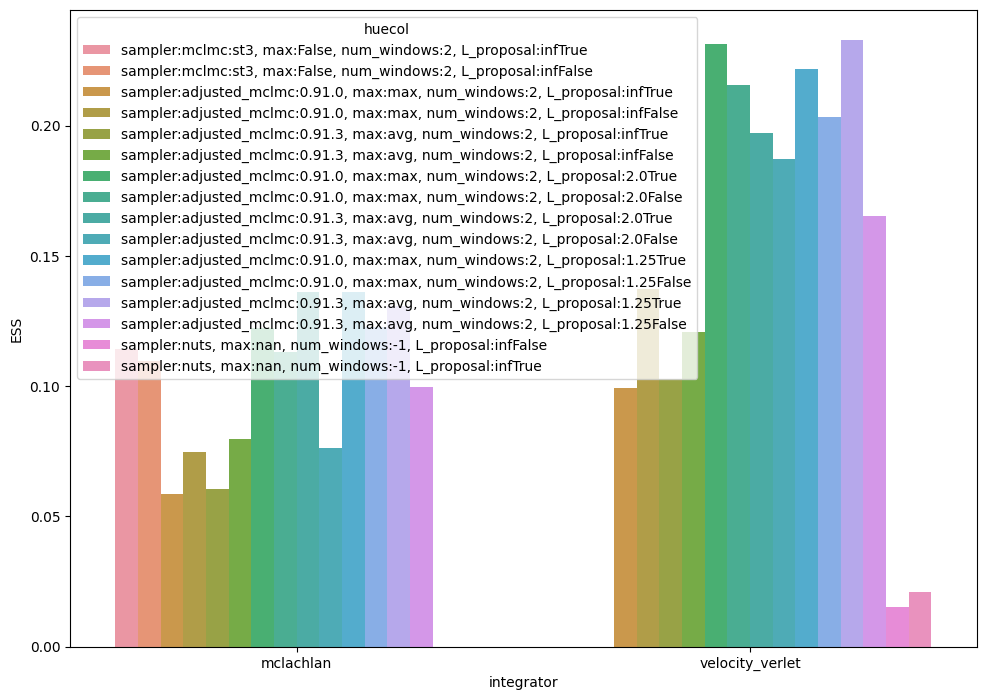

,model,dims,sampler,L,step_size,integrator,tuning,acc_rate,preconditioning,inv_L_prop,ess_avg,ess_corr_avg,ess_corr_min,ess_corr_inv_mean,num_steps,num_chains,worst,num_windows,ESS,huecol
0,Gaussian_log_1,10,mclmc:st3,2.644991,3.588054,mclachlan,standard,1.000000,True,0.0,0.416667,inf,inf,inf,1000,128,False,2,0.114155,"sampler:mclmc:st3, max:False, num_windows:2, L..."
1,Gaussian_log_1,10,mclmc:st3,2.563764,3.554103,mclachlan,standard,1.000000,False,0.0,0.434783,inf,inf,inf,1000,128,False,2,0.109649,"sampler:mclmc:st3, max:False, num_windows:2, L..."
2,Gaussian_log_1,10,adjusted_mclmc:0.91.0,3.162278,2.874814,mclachlan,standard,0.987249,True,0.0,0.220654,inf,inf,inf,1000,128,max,2,0.058500,"sampler:adjusted_mclmc:0.91.0, max:max, num_wi..."
3,Gaussian_log_1,10,adjusted_mclmc:0.91.0,3.522279,3.202071,mclachlan,standard,0.981457,False,0.0,0.249750,inf,inf,inf,1000,128,max,2,0.074884,"sampler:adjusted_mclmc:0.91.0, max:max, num_wi..."
4,Gaussian_log_1,10,adjusted_mclmc:0.91.3,3.162278,2.874833,mclachlan,standard,0.987161,True,0.0,0.214411,inf,inf,inf,1000,128,avg,2,0.060365,"sampler:adjusted_mclmc:0.91.3, max:avg, num_wi..."
5,Gaussian_log_1,10,adjusted_mclmc:0.91.3,4.077914,3.707193,mclachlan,standard,0.970605,False,0.0,0.291375,inf,inf,inf,1000,128,avg,2,0.079745,"sampler:adjusted_mclmc:0.91.3, max:avg, num_wi..."
6,Gaussian_log_1,10,adjusted_mclmc:0.91.0,3.162278,2.874810,mclachlan,standard,0.982965,True,0.5,0.510727,inf,inf,inf,1000,128,max,2,0.122190,"sampler:adjusted_mclmc:0.91.0, max:max, num_wi..."
7,Gaussian_log_1,10,adjusted_mclmc:0.91.0,3.491246,3.173859,mclachlan,standard,0.977836,False,0.5,0.488759,inf,inf,inf,1000,128,max,2,0.113071,"sampler:adjusted_mclmc:0.91.0, max:max, num_wi..."
8,Gaussian_log_1,10,adjusted_mclmc:0.91.3,3.162278,2.874835,mclachlan,standard,0.982883,True,0.5,0.522473,inf,inf,inf,1000,128,avg,2,0.136093,"sampler:adjusted_mclmc:0.91.3, max:avg, num_wi..."
9,Gaussian_log_1,10,adjusted_mclmc:0.91.3,4.103768,3.730697,mclachlan,standard,0.965883,False,0.5,0.297089,inf,inf,inf,1000,128,avg,2,0.076138,"sampler:adjusted_mclmc:0.91.3, max:avg, num_wi..."


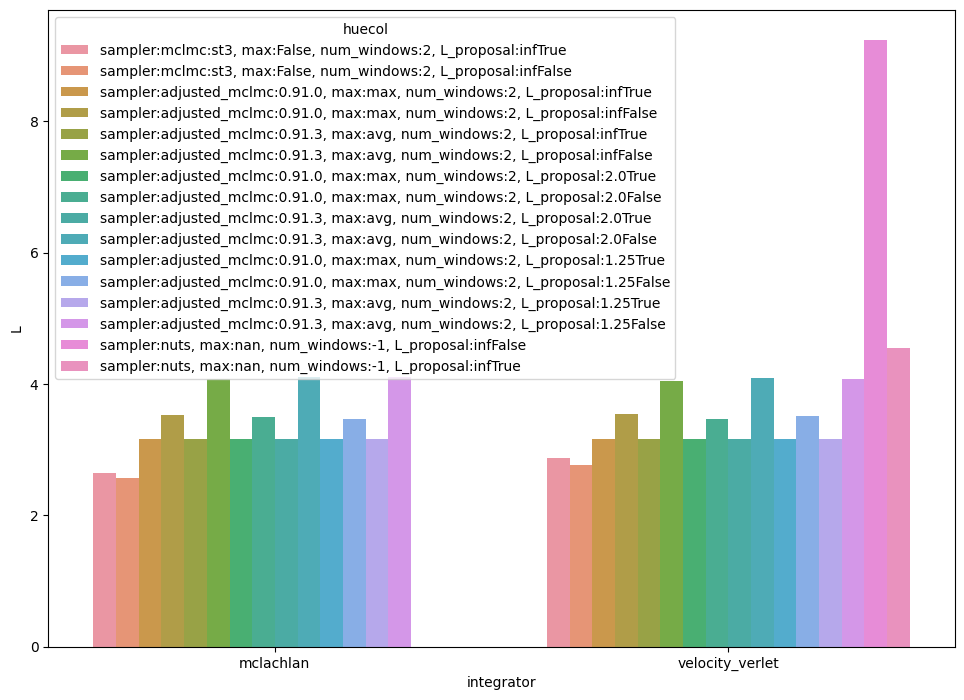

In [17]:
load_results_all(key_index=27)

,model,dims,sampler,L,step_size,integrator,tuning,acc_rate,preconditioning,inv_L_prop,ess_avg,ess_corr_avg,ess_corr_min,ess_corr_inv_mean,num_steps,num_chains,worst,num_windows,ESS
0,StochasticVolatility,2429,adjusted_mclmc:fast_gridTrue,37.630211,0.680033,mclachlan,gridsearch,0.897927,False,0.0,0.003586,0.000000,0.000000,0.000000,40000,20,True,1,0.000261
1,StochasticVolatility,2429,mclmc:st3,63.533913,1.572609,mclachlan,standard,1.000000,False,0.0,0.000000,0.024252,0.003478,0.012748,40000,20,False,1,0.000000
2,StochasticVolatility,2429,mclmc:st3,90.944023,1.703013,mclachlan,standard,1.000000,False,0.0,0.000000,0.013172,0.004049,0.007380,40000,20,False,2,0.000000
3,StochasticVolatility,2429,adjusted_mclmc:0.91.0,13.885084,0.814144,mclachlan,standard,0.900291,False,0.0,0.002306,0.066218,0.027378,0.062582,40000,20,True,2,0.000159
4,StochasticVolatility,2429,adjusted_mclmc:0.91.3,14.394537,0.804769,mclachlan,standard,0.901272,False,0.0,0.002197,0.070025,0.053267,0.068796,40000,20,True,2,0.000168
5,StochasticVolatility,2429,adjusted_mclmc:0.91.0,9.281753,0.866707,mclachlan,standard,0.900953,False,0.0,0.001609,0.029139,0.027739,0.029120,40000,20,False,2,0.000000
6,StochasticVolatility,2429,adjusted_mclmc:0.91.3,12.114930,0.831893,mclachlan,standard,0.900002,False,0.0,0.001997,0.049698,0.047709,0.049673,40000,20,False,2,0.000153
7,StochasticVolatility,2429,adjusted_mclmc:0.91.0,12.441225,0.824019,mclachlan,standard,0.901532,False,0.8,0.001297,0.035961,0.015001,0.030527,40000,20,True,2,0.000112
8,StochasticVolatility,2429,adjusted_mclmc:0.91.3,12.837461,0.803373,mclachlan,standard,0.902544,False,0.8,0.001384,0.037192,0.010866,0.032640,40000,20,True,2,0.000111
9,StochasticVolatility,2429,adjusted_mclmc:0.91.0,8.846463,0.860364,mclachlan,standard,0.898517,False,0.8,0.001068,0.018262,0.005306,0.016516,40000,20,False,2,0.000000


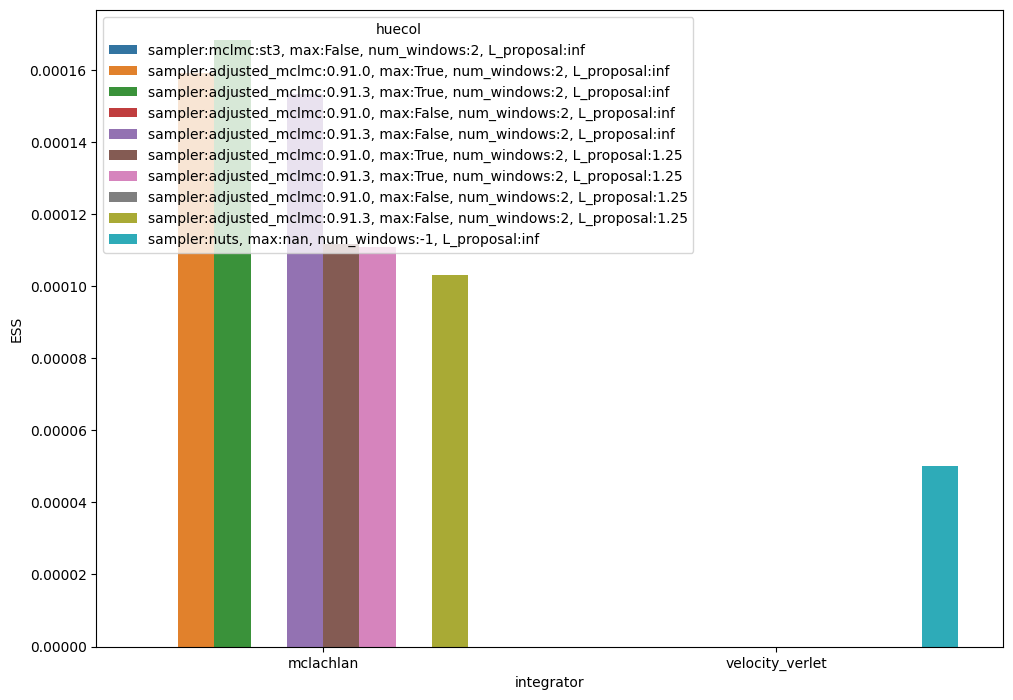

,model,dims,sampler,L,step_size,integrator,tuning,acc_rate,preconditioning,inv_L_prop,ess_avg,ess_corr_avg,ess_corr_min,ess_corr_inv_mean,num_steps,num_chains,worst,num_windows,ESS,huecol
2,StochasticVolatility,2429,mclmc:st3,90.944023,1.703013,mclachlan,standard,1.000000,False,0.0,0.000000,0.013172,0.004049,0.007380,40000,20,False,2,0.000000,"sampler:mclmc:st3, max:False, num_windows:2, L..."
3,StochasticVolatility,2429,adjusted_mclmc:0.91.0,13.885084,0.814144,mclachlan,standard,0.900291,False,0.0,0.002306,0.066218,0.027378,0.062582,40000,20,True,2,0.000159,"sampler:adjusted_mclmc:0.91.0, max:True, num_w..."
4,StochasticVolatility,2429,adjusted_mclmc:0.91.3,14.394537,0.804769,mclachlan,standard,0.901272,False,0.0,0.002197,0.070025,0.053267,0.068796,40000,20,True,2,0.000168,"sampler:adjusted_mclmc:0.91.3, max:True, num_w..."
5,StochasticVolatility,2429,adjusted_mclmc:0.91.0,9.281753,0.866707,mclachlan,standard,0.900953,False,0.0,0.001609,0.029139,0.027739,0.029120,40000,20,False,2,0.000000,"sampler:adjusted_mclmc:0.91.0, max:False, num_..."
6,StochasticVolatility,2429,adjusted_mclmc:0.91.3,12.114930,0.831893,mclachlan,standard,0.900002,False,0.0,0.001997,0.049698,0.047709,0.049673,40000,20,False,2,0.000153,"sampler:adjusted_mclmc:0.91.3, max:False, num_..."
7,StochasticVolatility,2429,adjusted_mclmc:0.91.0,12.441225,0.824019,mclachlan,standard,0.901532,False,0.8,0.001297,0.035961,0.015001,0.030527,40000,20,True,2,0.000112,"sampler:adjusted_mclmc:0.91.0, max:True, num_w..."
8,StochasticVolatility,2429,adjusted_mclmc:0.91.3,12.837461,0.803373,mclachlan,standard,0.902544,False,0.8,0.001384,0.037192,0.010866,0.032640,40000,20,True,2,0.000111,"sampler:adjusted_mclmc:0.91.3, max:True, num_w..."
9,StochasticVolatility,2429,adjusted_mclmc:0.91.0,8.846463,0.860364,mclachlan,standard,0.898517,False,0.8,0.001068,0.018262,0.005306,0.016516,40000,20,False,2,0.000000,"sampler:adjusted_mclmc:0.91.0, max:False, num_..."
10,StochasticVolatility,2429,adjusted_mclmc:0.91.3,11.805532,0.863541,mclachlan,standard,0.901189,False,0.8,0.001411,0.031274,0.017753,0.030714,40000,20,False,2,0.000103,"sampler:adjusted_mclmc:0.91.3, max:False, num_..."
11,StochasticVolatility,2429,nuts,0.000000,0.000000,velocity_verlet,standard,0.797744,False,0.0,0.003600,1.044727,0.983686,1.044235,40000,20,NaN,-1,0.000050,"sampler:nuts, max:nan, num_windows:-1, L_propo..."


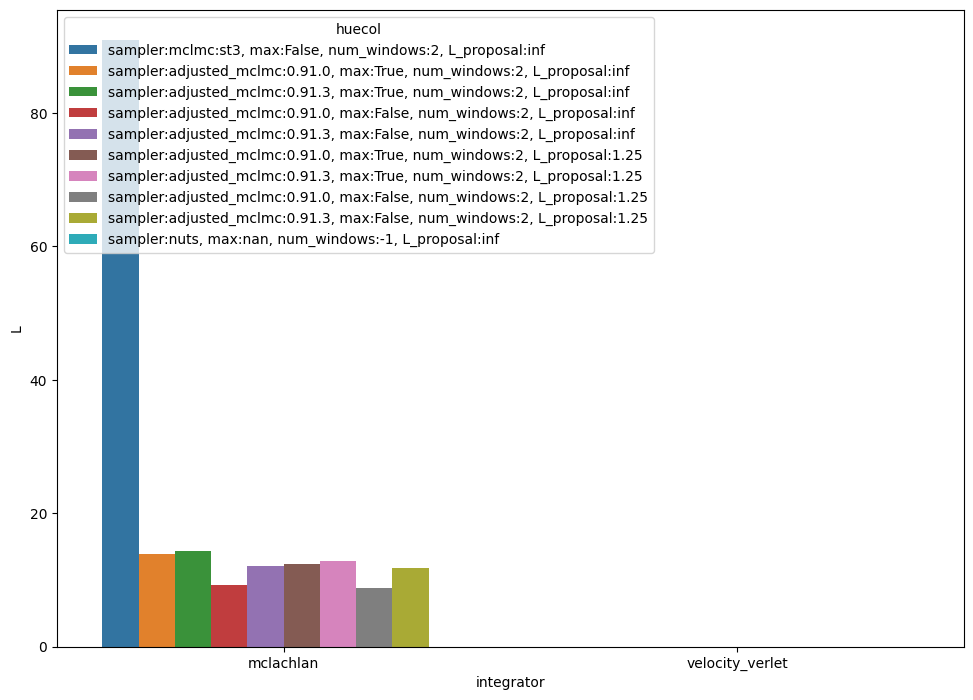

In [12]:
load_results_all(key_index=23)